# Pytorch Basic  

작성자: 김국진 kukjinkim@korea.ac.kr  


금일 실습 시간에는 Pytorch를 통해서 MNIST 데이터셋으로 분류문제를 실습할 것입니다. 

# Contents
- Class Review 
- Tensor, Tensor Manipulation
- What is deep learning? 
- Regresseion 
- Dataset, DataLoader 
- Optimizer 
- Classification <-
- Convolution Neural Networks

# 1. Classification?  

![](2023-05-02-19-18-48.png)  
https://towardsdatascience.com/10-papers-you-should-read-to-understand-image-classification-in-the-deep-learning-era-4b9d792f45a7  

분류 문제는 특정 입력값을 받아서 하나의 클래스를 선택하는 작업입니다. 개와 고양이 사진을 받았을 때 0 (Dog), 1(Cat)으로 분류하는 것이 그 예시입니다. 

![](2023-05-02-15-29-27.png)

앞의 회귀 문제를 실습할 때눈 $f(x)$가 입력에 대해서 실수값을 출력 했습니다.  
반면 분류 문제에서는 $f(x)$가 입력에 대해서 정수값 (범주)를 출력합니다. 

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset 
from torchvision import datasets, transforms

## Dataset, Dataloader
금일 실습은 MNIST 데이터셋 (숫자분류)에 대해서 진행할 것입니다. torch 내부에는 이미 MNIST에 대한 데이터셋 모듈이 정의되어 있습니다. 아래의 블록을 실행하면 데이터셋이 자동으로 다운로드됩니다.  



In [2]:
batch_size = 32
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


데이터셋을 파악하기 위해 shape와 classes에 접근해봅니다.  

In [3]:
print(len(train_dataset)) # 1
print(train_dataset.data.shape) # 2
print(train_dataset.classes)  # 3

60000
torch.Size([60000, 28, 28])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## Define Neural Network  
정리하자면 뉴럴 네트워크를 정의하기 위해 다음과 같은 과정들이 필요합니다.  
#### 1. 데이터의 shape 또는 dimension을 파악한다.
#### 2. 데이터의 클래스 종류 및 클래스 수를 파악한다.
#### 3. 모델의 입력과 출력 사이즈를 정한다.



# Practice
이제 데이터의 모양을 알았으니 이를 처리하는 뉴럴 네트워크를 정의해야합니다. 
Classifier 클래스는 다음의 기능들이 구현되어 있습니다. 
- `__init__(self)`:
  - 입력 크기가 784, 출력 크기가 10인 뉴럴 네트워크를 정의하세요. 
  - 입력 레이어의 뉴런수는 512 입니다. 
  - 레이어들은 은닉층의 수는 2개이고, 은닉층의 뉴런수는 256, 128 입니다. 
  - 따라서 우리는 4개의 행렬과 세 개의 활성화함수를 필요로 합니다. 
- `forward(self, x)`:
  - 뉴럴 네트워크의 연산을 `__init__`에 정의된 레이어들로 구현합니다.
  - 제일 처음으로, 입력 이미지 (28x28)를 784 차원으로 flatten 합니다. (이전 Pytorch 1 실습 참조)
  - 활성화함수는 relu를 사용합니다. 

In [145]:
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        pass 
    
    def forward(self, x):
        # Flatten the data (batch_size, 1, 28, 28)-> (batch_size, 784)
        pass


In [87]:
# test code
model = Classifier()
random_image = torch.randn([1, 28, 28])
output = model(random_image)
print(output)

tensor([[-0.0653,  0.0395, -0.0097,  0.0036,  0.0267,  0.0366, -0.0152,  0.0061,
         -0.1525, -0.0788]], grad_fn=<AddmmBackward0>)


### Training & Test

이전에 정의한 `train` 함수를 그대로 사용하겠습니다. 여기서 test를 위한 함수 `test`도 정의하겠습니다.  

In [88]:
def train(device, model, optimizer, loss_func, train_data_loader, epochs, print_interval):
    epoch_loss_list = []
    for e in range(1, epochs+1):
        epoch_mean_loss = 0
        for mini_batch_index, samples in enumerate(train_data_loader):
            x_train, y_train = samples
            mini_batch_size = x_train.shape[0]
            x_train = x_train.to(device)
            y_train = y_train.to(device)
            y_pred = model(x_train)
            optimizer.zero_grad()
            loss = loss_func(y_pred, y_train) 
            loss.backward() 
            optimizer.step()
            # if (e % print_interval == 0) and (mini_batch_index % mini_batch_size == 0):
            #     print(f'Epoch: {e:4d}/{epochs} MiniBatch: {(mini_batch_index+1)*len(mini_batch_size):4d}/{len(train_data_loader.dataset)} \
            #         Loss: {loss.item():4f}')
            if mini_batch_index % 100 == 0:
                print(f'Train Epoch: {e} | Batch Status: {(mini_batch_index)*len(x_train)}/{len(train_loader.dataset)} \
                ({100. * mini_batch_index * batch_size / len(train_loader.dataset):.0f}% | Loss: {loss.item():.6f}')

            epoch_mean_loss += loss.item()
        epoch_loss_list.append(epoch_mean_loss/len(train_data_loader))
    return epoch_loss_list

def test(device, model, loss_func, test_data_loader):
    test_loss = 0
    correct_count = 0
    for mini_batch_index, samples in enumerate(test_data_loader):
        x_train, y_train = samples
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        y_pred = model(x_train)
        loss = loss_func(y_pred, y_train) 
        pred = y_pred.data.max(1, keepdim=True)[1]
        correct_count += pred.eq(y_train.data.view_as(pred)).cpu().sum()
        test_loss += loss.item()
    test_loss / len(test_data_loader)
    print(f'=======================\n Test set: Average loss: {test_loss:.4f}, Accuracy: {correct_count/len(test_loader.dataset):.3}')

분류 문제에서는 `cross_entropy`를 손실함수로 자주 사용합니다. 

In [89]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
torch.manual_seed(42)
model = Classifier().to(device, dtype=torch.float)
loss_func = nn.CrossEntropyLoss()
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
batch_size = 256
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
print_interval = 1
epochs = 5


cuda


In [152]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

567434


In [90]:
epoch_loss_list = train(device, model, optimizer, loss_func, train_loader, epochs, print_interval)


Train Epoch: 1 | Batch Status: 0/60000                 (0% | Loss: 2.300814
Train Epoch: 1 | Batch Status: 25600/60000                 (43% | Loss: 0.314712
Train Epoch: 1 | Batch Status: 51200/60000                 (85% | Loss: 0.151141
Train Epoch: 2 | Batch Status: 0/60000                 (0% | Loss: 0.248748
Train Epoch: 2 | Batch Status: 25600/60000                 (43% | Loss: 0.127893
Train Epoch: 2 | Batch Status: 51200/60000                 (85% | Loss: 0.137262
Train Epoch: 3 | Batch Status: 0/60000                 (0% | Loss: 0.109112
Train Epoch: 3 | Batch Status: 25600/60000                 (43% | Loss: 0.085035
Train Epoch: 3 | Batch Status: 51200/60000                 (85% | Loss: 0.144060
Train Epoch: 4 | Batch Status: 0/60000                 (0% | Loss: 0.076693
Train Epoch: 4 | Batch Status: 25600/60000                 (43% | Loss: 0.049980
Train Epoch: 4 | Batch Status: 51200/60000                 (85% | Loss: 0.063927
Train Epoch: 5 | Batch Status: 0/60000          

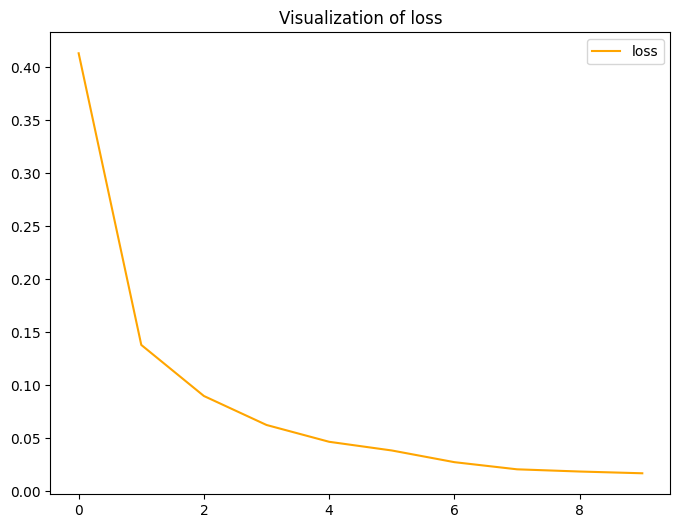

In [91]:
epochs_range = np.arange(epochs)
plt.figure(figsize=(8,6))
plt.yscale('linear')
plt.plot(epochs_range, epoch_loss_list, color='orange')
plt.title('Visualization of loss')
plt.legend(['loss'], loc = 'best')


In [92]:
test(device, model, loss_func, test_loader)


 Test set: Average loss: 4.1751, Accuracy: 0.973


테스트 데이터셋에 대해서 분류를 시도한 결과, 97%의 정확도를 달성했습니다!! 정말 실제로 잘 분류하는지 데이터를 시각화해서 확인해보겠습니다. 

torch.Size([1, 28, 28])
7
torch.Size([1, 28, 28]) 7
torch.Size([1, 28, 28]) 2
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 0
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 9
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 9


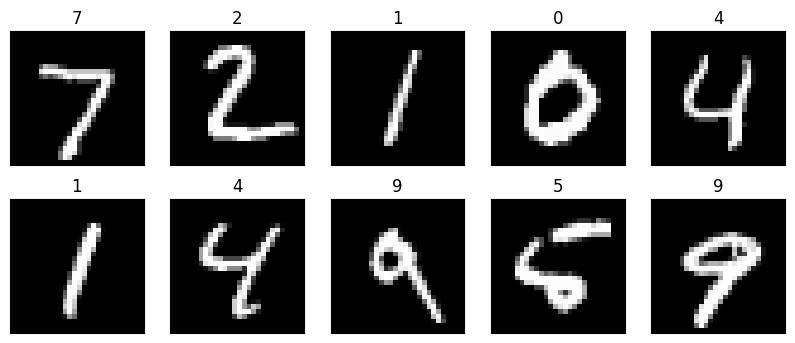

In [146]:
# Visualizing test data
test_image, test_label = test_dataset[0]
print(test_image.shape)
print(test_label)
plt.figure(figsize=(10, 4))
rows=2
cols=5
test_imgs = []
for i, xy in enumerate(test_dataset):
    img = xy[0]
    label = xy[1]
    print(img.shape, label)
    test_imgs.append(img)
    img = img.permute(1, 2, 0)
    ary = img.numpy()
    plt.subplot(rows, cols, i+1)
    plt.title(label)
    plt.xticks([])  
    plt.yticks([]) 
    plt.imshow(ary, cmap='gray')
    if i+1 == 10:
        break
plt.show()


In [147]:
test_imgs_tensor = torch.stack(test_imgs)
test_imgs_tensor.shape

torch.Size([10, 1, 28, 28])

모델의 출력값에서 가장 값이 큰 인덱스를 분류 결과로 사용합니다. 
결과적으로 분류가 잘 되는 것을 확인할 수 있습니다. 

In [149]:
output = model(test_imgs_tensor.to(device))
index = torch.argmax(output, dim=-1)
index

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0')

# Convolutional Neural Networks
딥러닝의 대중화를 이끈 것은 컴퓨터 비전에 적용된 Convolutional Neural Network와 자연어처리에 적용된 Attention Mechanism입니다. 

![](2023-05-02-21-34-50.png)

https://developersbreach.com/convolution-neural-network-deep-learning/

CNN은 이미지 처리를 위해 고안된 네트워크 아키텍처로 이미지에 커널을 슬라이딩하면서 연산하는 방식으로 동작합니다. 가중치를 공유하는 방식으로 더 적은 파라미터를 사용해서 feature를 잘 추출할 수 있습니다. 

## Feature extraction
![](2023-05-02-21-42-20.png)

![](cnn.gif)
https://medium.datadriveninvestor.com/convolutional-neural-networks-3b241a5da51e?gi=d4707ea36199

![](cnn2.gif)

위 그림과 같이 같은 이미지에 대한 여러 개의 커널을 사용해서 컨볼루션을 진행하고 feature map (output)을 만들어냅니다. 그리고 이를 flatten 시키고 Fully connected layer에 통과시켜서 최종적인 분류를 진행합니다. 

![](2023-05-02-21-41-24.png)

### CNN class
CNN은 기존의 MLP와 네트워크 구조와 연산방식만 다를 뿐 수행하는 기능은 똑같습니다. 

In [153]:
class CNN(nn.Module):
    def __init__(self, C, W, H, K, S): # Channel, width, height, kerel_size, stride
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(C, 32, kernel_size=K, stride=S)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=K, stride=S)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=K, stride=S)
        self.bn3 = nn.BatchNorm2d(128)
        
        def conv2d_size_out(size, kernel_size=K, stride=S):
            print((size - (kernel_size - 1) - 1) // stride + 1)
            return (size - (kernel_size - 1) - 1) // stride + 1
        
        convw = conv2d_size_out(W, K, S)
        convw = conv2d_size_out(convw, K, S)
        convw = conv2d_size_out(convw, K, S)
        
        self.linear_input_size = convw * convw * 128
        self.fc = nn.Linear(self.linear_input_size, 10)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = x.view(x.size(0), -1) # (batch_size, flatten_size)
        x = F.relu(self.fc(x))
        return F.log_softmax(x)
        

In [174]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
torch.manual_seed(42)
cnn = CNN(C=1, W=28, H=28, K=3, S=2).to(device)
loss_func = nn.CrossEntropyLoss()
lr = 0.0005
optimizer = optim.Adam(cnn.parameters(), lr=lr)
batch_size = 1024
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
print_interval = 1
epochs = 20

cuda
13
6
2


In [175]:
total_params = sum(p.numel() for p in cnn.parameters())
print(total_params)

98250


In [176]:
epoch_loss_list = train(device, cnn, optimizer, loss_func, train_loader, epochs, print_interval)

C:\Users\ye200\AppData\Local\Temp\ipykernel_43564\2978515042.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 | Batch Status: 0/60000                 (0% | Loss: 2.338116
Train Epoch: 2 | Batch Status: 0/60000                 (0% | Loss: 0.457169
Train Epoch: 3 | Batch Status: 0/60000                 (0% | Loss: 0.409045
Train Epoch: 4 | Batch Status: 0/60000                 (0% | Loss: 0.347496
Train Epoch: 5 | Batch Status: 0/60000                 (0% | Loss: 0.071366
Train Epoch: 6 | Batch Status: 0/60000                 (0% | Loss: 0.046133
Train Epoch: 7 | Batch Status: 0/60000                 (0% | Loss: 0.032610
Train Epoch: 8 | Batch Status: 0/60000                 (0% | Loss: 0.020855
Train Epoch: 9 | Batch Status: 0/60000                 (0% | Loss: 0.024076
Train Epoch: 10 | Batch Status: 0/60000                 (0% | Loss: 0.014273
Train Epoch: 11 | Batch Status: 0/60000                 (0% | Loss: 0.017208
Train Epoch: 12 | Batch Status: 0/60000                 (0% | Loss: 0.014141
Train Epoch: 13 | Batch Status: 0/60000                 (0% | Loss: 0.011432
Train Ep

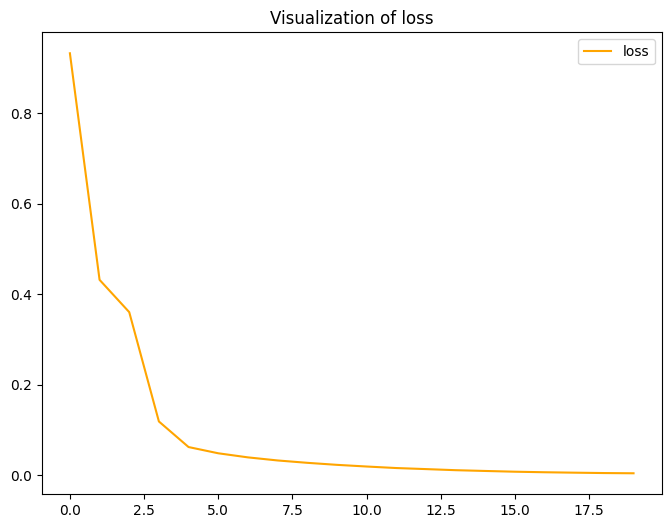

In [177]:
epochs_range = np.arange(epochs)
plt.figure(figsize=(8,6))
plt.yscale('linear')
plt.plot(epochs_range, epoch_loss_list, color='orange')
plt.title('Visualization of loss')
plt.legend(['loss'], loc = 'best')

In [178]:
test(device, cnn, loss_func, test_loader)


C:\Users\ye200\AppData\Local\Temp\ipykernel_43564\2978515042.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


 Test set: Average loss: 0.3749, Accuracy: 0.988


torch.Size([1, 28, 28])
7
torch.Size([1, 28, 28]) 7
torch.Size([1, 28, 28]) 2
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 0
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 9
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 9


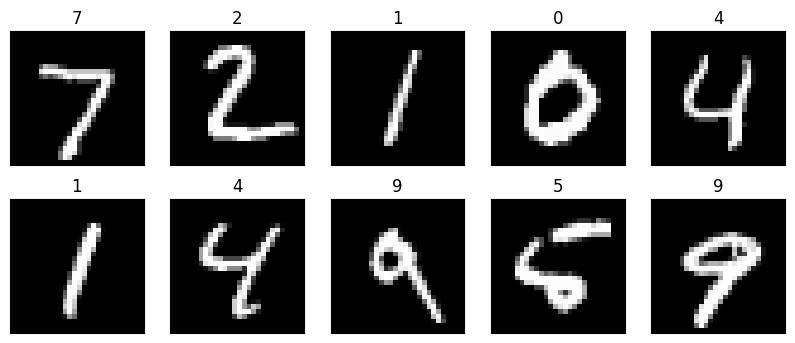

In [180]:
# Visualizing test data
test_image, test_label = test_dataset[0]
print(test_image.shape)
print(test_label)
plt.figure(figsize=(10, 4))
rows=2
cols=5
test_imgs = []
for i, xy in enumerate(test_dataset):
    img = xy[0]
    label = xy[1]
    print(img.shape, label)
    test_imgs.append(img)
    img = img.permute(1, 2, 0)
    ary = img.numpy()
    plt.subplot(rows, cols, i+1)
    plt.title(label)
    plt.xticks([])  
    plt.yticks([]) 
    plt.imshow(ary, cmap='gray')
    if i+1 == 10:
        break
plt.show()

In [179]:
output = cnn(test_imgs_tensor.to(device))
index = torch.argmax(output, dim=-1)
index

C:\Users\ye200\AppData\Local\Temp\ipykernel_43564\2978515042.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0')

# Summary
결국 본질적으로 CNN을 학습하는 것도 비선형함수를 근사하는 것입니다. 네트워크의 구조와 연산방식이 달라서 기존의 MLP보다 더 효율적입니다. CNN은 나중에 Deepmind에서 출판한 DQN 논문에서 Atari 게임들을 학습하는데 사용됩니다. 